In [2]:
import os, sys

import numpy as np
import pandas as pd

indir = "/Users/vv/git/voelzlab/sandbox/vvoelz/facs_enrichment_Kds"
log10Kds_csv = os.path.join(indir, "round2_Log10Kd_estimates_20230914.csv")
df = pd.read_csv(log10Kds_csv)
df

,Unnamed: 0,SeqIndex,Sequence,Log10Kd,Log10Kd Uncertainty
0,0,0,CYTTESPSPFAAEIVAQIAAEFNWEVHVQQHGDTVKVQVC,-3.415808,0.247795
1,1,1,TREINARSPFAAWIAAEIAKEFGYEVEVHKKNGKFTLHSQ,-6.898675,0.037632
2,2,2,TWTSESKSPFSAQILADICKEFNWEVHVQQHGDTVEVTCH,-3.337475,0.191577
3,3,3,TIQLTSHSPFDAWMAAMWAAAFGAPFTVENHNGNFQVHIH,-3.434208,0.235491
4,4,4,TLTSVAKYEFAAKIAADIAAEFNWHVEIHKHGDQVTVKVQ,-3.590908,0.417016
...,...,...,...,...,...
15485,15485,15485,TYKIKACYPFAAIIAALILQEFGIPATVQTENGTVYVQEN,-3.347833,0.168423
15486,15486,15486,TFCVDCNSPFACQIAKDIADEFNPTGRCTVTNGRRCCQF,-3.310992,0.203102
15487,15487,15487,TLTIKVTSFANAIAAAIKALFNNLEVHITRVGDHCQVQVN,-3.282583,0.165924
15488,15488,15488,TIKTHVTSKFAALMAAMWCKAFNSTVTLHHHGHTVKVKCD,-3.219383,0.142575


In [3]:
# Get only the sequences that correspond to A8, A13 and A18 SSMs
gitdir = '/Users/vv/git/HA-binders-SSM'
A8_sequence = open( os.path.join(gitdir, 'data/sequences/A8_sequence.afasta')).readlines()[0].replace('\n','')
A13_sequence = open( os.path.join(gitdir, 'data/sequences/A13_sequence.afasta')).readlines()[0].replace('\n','')
A18_sequence = open( os.path.join(gitdir, 'data/sequences/A18_sequence.afasta')).readlines()[0].replace('\n','')
print('A8_sequence', A8_sequence, len(A8_sequence), 'residues')
print('A13_sequence', A13_sequence, len(A13_sequence), 'residues')
print('A18_sequence', A18_sequence, len(A18_sequence), 'residues')

# Lists to store row indices for each SSM series
A8_SSM_indices = []
A13_SSM_indices = []
A18_SSM_indices = []

# First, find the WT sequence row indices and add them to the lists
A8_SSM_indices.append( df[ df['Sequence'] == A8_sequence ].index[0] )
A13_SSM_indices.append( df[ df['Sequence'] == A13_sequence ].index[0] )
A18_SSM_indices.append( df[ df['Sequence'] == A18_sequence ].index[0] )

# Next, find all the SSM variants
nres = 40
amino_acids = ['R', 'H', 'K', 'D', 'E', 'S', 'T', 'N', 'Q', 'C', 'G', 'P', 'A', 'V', 'I', 'L', 'M', 'F', 'Y', 'W']
for pos in range(0, nres):
    for aa in amino_acids:
        if pos == 0:
            A8_mut_sequence = aa + A8_sequence[pos+1:] 
            A13_mut_sequence = aa + A13_sequence[pos+1:] 
            A18_mut_sequence = aa + A18_sequence[pos+1:] 
        elif pos == nres-1:
            A8_mut_sequence = A8_sequence[:nres-1] + aa
            A13_mut_sequence = A13_sequence[:nres-1] + aa
            A18_mut_sequence = A18_sequence[:nres-1] + aa
        else:
            A8_mut_sequence = A8_sequence[0:pos] + aa + A8_sequence[pos+1:]
            A13_mut_sequence = A13_sequence[0:pos] + aa + A13_sequence[pos+1:]
            A18_mut_sequence = A18_sequence[0:pos] + aa + A18_sequence[pos+1:]
        #print(pos, aa, A8_mut_sequence)

        sliced_df = df[ df['Sequence'] == A8_mut_sequence ]
        if sliced_df.empty:
            pass
        else:
            A8_SSM_indices.append( sliced_df.index[0] )

        sliced_df = df[ df['Sequence'] == A13_mut_sequence ]
        if sliced_df.empty:
            pass
        else:
            A13_SSM_indices.append( sliced_df.index[0] )

        sliced_df = df[ df['Sequence'] == A18_mut_sequence ]
        if sliced_df.empty:
            pass
        else:
            A18_SSM_indices.append( sliced_df.index[0] )

print('Found:', len(A8_SSM_indices), 'A8_SSM_indices')
print('Found:', len(A13_SSM_indices), 'A13_SSM_indices')
print('Found:', len(A18_SSM_indices), 'A18_SSM_indices')

# compile indices of all the rest
other_indices = []
for i in range(15490):
    if (A8_SSM_indices.count(i) + A13_SSM_indices.count(i) + A18_SSM_indices.count(i) ) == 0:
        other_indices.append(i)
len(other_indices)

A8_sequence TSRVRATSKFAALIAAEIAREFGYTVDVQEVNGQWEVTFD 40 residues
A13_sequence CIEISVTTPFACQIAAEIWRAFGYEVKIDDDNGNCRLHVC 40 residues
A18_sequence CQDYTFTDPFACQIAAEILRDFGYDCTVQTNNGECRVRCC 40 residues
Found: 796 A8_SSM_indices
Found: 801 A13_SSM_indices
Found: 797 A18_SSM_indices


13216

# Let's make some plots

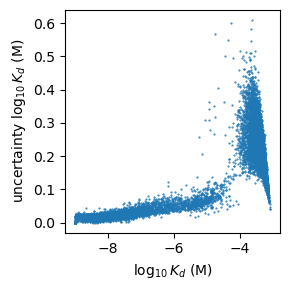

In [4]:
log10Kds = df['Log10Kd']
log10Kd_sigmas = df['Log10Kd Uncertainty']

from matplotlib import pyplot as plt

plt.figure( figsize=(3,3) )
plt.plot(log10Kds, log10Kd_sigmas, '.', ms=1)
#plt.scatter(log10Kds, log10Kd_sigmas, s=80, facecolors='none', edgecolors='r')
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('$\log_{10} K_d$ (M)')
plt.ylabel('uncertainty $\log_{10} K_d$ (M)')
plt.tight_layout()

plt.savefig('uncertainty_vs_log10Kd.pdf')


## Distribution of all inferred Kds

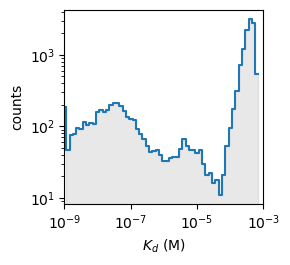

In [5]:
dlogbin = 0.1
logbins = 10.0**(np.arange(-9,-3, dlogbin))
Kds = np.power(10.0, log10Kds)
Kd_hist, Kd_binedges = np.histogram(Kds, bins=logbins)
Kd_bincenters = (Kd_binedges[0:-1] + Kd_binedges[1:])/2.0

plt.figure( figsize=(3,2.75) )

plt.fill_between(Kd_bincenters, Kd_hist, step="pre", alpha=0.3, color=(0.7, 0.7, 0.7))

plt.step(Kd_bincenters, Kd_hist)
plt.xscale('log')
plt.xlim(1e-9, 1e-3)
plt.yscale('log')
plt.xlabel('$K_d$ (M)')
plt.ylabel('counts')
plt.tight_layout()
plt.savefig('distribution_all_log10Kd.pdf')

## Distributions broken down by A8, A13 and A18

14356    7.100000e-09
800      3.322449e-09
816      7.142770e-09
814      1.139025e-08
813      9.351365e-09
             ...     
2560     4.870329e-09
2559     3.204916e-09
2554     1.391794e-08
2546     3.539430e-08
2544     5.719504e-09
Name: Log10Kd, Length: 796, dtype: float64
Found: 796 A8_SSM_indices
Found: 801 A13_SSM_indices
Found: 797 A18_SSM_indices


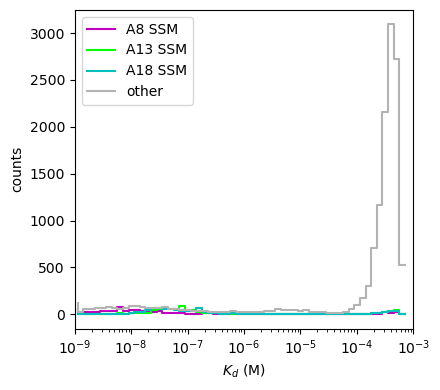

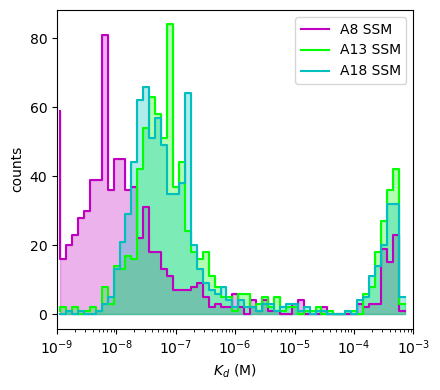

In [6]:
Kds = np.power(10.0, log10Kds)
print(Kds[A8_SSM_indices])

print('Found:', len(A8_SSM_indices), 'A8_SSM_indices')
print('Found:', len(A13_SSM_indices), 'A13_SSM_indices')
print('Found:', len(A18_SSM_indices), 'A18_SSM_indices')
dlogbin = 0.1
logbins = 10.0**(np.arange(-9,-3, dlogbin))

Kd_hist_A8, Kd_binedges_A8 = np.histogram(Kds[A8_SSM_indices], bins=logbins)
Kd_bincenters_A8 = (Kd_binedges_A8[0:-1] + Kd_binedges_A8[1:])/2.0

Kd_hist_A13, Kd_binedges_A13 = np.histogram(Kds[A13_SSM_indices], bins=logbins)
Kd_bincenters_A13 = (Kd_binedges_A13[0:-1] + Kd_binedges_A13[1:])/2.0

Kd_hist_A18, Kd_binedges_A18 = np.histogram(Kds[A18_SSM_indices], bins=logbins)
Kd_bincenters_A18 = (Kd_binedges_A18[0:-1] + Kd_binedges_A18[1:])/2.0

Kd_hist_other, Kd_binedges_other = np.histogram(Kds[other_indices], bins=logbins)
Kd_bincenters_other = (Kd_binedges_other[0:-1] + Kd_binedges_A18[1:])/2.0

##### Include "other" sequences" Linear
plt.figure( figsize=(4.5,4) )
plt.step(Kd_bincenters_A8, Kd_hist_A8, color='m', label='A8 SSM')
plt.step(Kd_bincenters_A13, Kd_hist_A13, color=(0.0, 1.0, 0.0), label='A13 SSM')
plt.step(Kd_bincenters_A18, Kd_hist_A18, color='c', label='A18 SSM')
plt.step(Kd_bincenters_other, Kd_hist_other, color=(0.7, 0.7, 0.7), label='other')
plt.xscale('log')
plt.xlim(1e-9, 1e-3)

# plt.yscale('log')
plt.xlabel('$K_d$ (M)')
plt.ylabel('counts')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('distribution_by_group_log10Kd.pdf')


### Just the A8, A13, and A18 SSM sequences

plt.figure( figsize=(4.5,4) )

plt.fill_between(Kd_bincenters_A8, Kd_hist_A8, step="pre", alpha=0.3, color='m')
plt.fill_between(Kd_bincenters_A13, Kd_hist_A13, step="pre", alpha=0.3, color=(0.0, 1.0, 0.0))
plt.fill_between(Kd_bincenters_A18, Kd_hist_A18, step="pre", alpha=0.3, color='c')

plt.step(Kd_bincenters_A8, Kd_hist_A8, color='m', label='A8 SSM')
plt.step(Kd_bincenters_A13, Kd_hist_A13, color=(0.0, 1.0, 0.0), label='A13 SSM')
plt.step(Kd_bincenters_A18, Kd_hist_A18, color='c', label='A18 SSM')


# plt.plot(x,y, drawstyle="steps")
# plt.plot(x,y2, drawstyle="steps")
# plt.step(Kd_bincenters_other, Kd_hist_other, color=(0.7, 0.7, 0.7), label='other')
plt.xscale('log')
plt.xlim(1e-9, 1e-3)

#plt.yscale('log')
plt.xlabel('$K_d$ (M)')
plt.ylabel('counts')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('distribution_by_miniprotein_log10Kd.pdf')


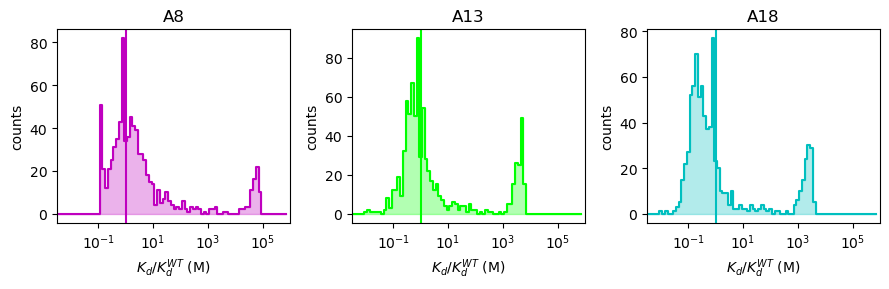

In [7]:
### Just the A8, A13, and A18 SSM sequences with respect to WT

plt.figure( figsize=(9,3) )

## Bin the data in terms of relative K_d / K_d^{WT} 

dlogbin = 0.1
logKd_min, logKd_max = -2.5, 6.0
Kd_min, Kd_max = np.power(10, logKd_min), np.power(10, logKd_max)
logbins = 10.0**(np.arange(logKd_min, logKd_max, dlogbin))

Kds = np.power(10.0, log10Kds)

# Recall that the first entry on the list are the WT values:

Kd_hist_A8, Kd_binedges_A8 = np.histogram(Kds[A8_SSM_indices]/Kds[A8_SSM_indices[0]], bins=logbins)
Kd_bincenters_A8 = (Kd_binedges_A8[0:-1] + Kd_binedges_A8[1:])/2.0

Kd_hist_A13, Kd_binedges_A13 = np.histogram(Kds[A13_SSM_indices]/Kds[A13_SSM_indices[0]], bins=logbins)
Kd_bincenters_A13 = (Kd_binedges_A13[0:-1] + Kd_binedges_A13[1:])/2.0

Kd_hist_A18, Kd_binedges_A18 = np.histogram(Kds[A18_SSM_indices]/Kds[A18_SSM_indices[0]], bins=logbins)
Kd_bincenters_A18 = (Kd_binedges_A18[0:-1] + Kd_binedges_A18[1:])/2.0

plt.subplot(1,3,1)
plt.fill_between(Kd_bincenters_A8, Kd_hist_A8, step="pre", alpha=0.3, color='m')
plt.step(Kd_bincenters_A8, Kd_hist_A8, color='m', label='A8 SSM')
plt.axvline(x=1, color='m')
plt.xscale('log')
plt.xlim(Kd_min, Kd_max)
plt.xlabel('$K_d / K_d^{WT}$ (M)')
plt.ylabel('counts')
plt.title('A8')

plt.subplot(1,3,2)
plt.fill_between(Kd_bincenters_A13, Kd_hist_A13, step="pre", alpha=0.3, color=(0.0, 1.0, 0.0))
plt.step(Kd_bincenters_A13, Kd_hist_A13, color=(0.0, 1.0, 0.0), label='A13 SSM')
plt.axvline(x=1, color=(0.0, 1.0, 0.0))
plt.xscale('log')
plt.xlim(Kd_min, Kd_max)
plt.xlabel('$K_d / K_d^{WT}$ (M)')
plt.ylabel('counts')
plt.title('A13')

plt.subplot(1,3,3)
plt.fill_between(Kd_bincenters_A18, Kd_hist_A18, step="pre", alpha=0.3, color='c')
plt.step(Kd_bincenters_A18, Kd_hist_A18, color='c', label='A18 SSM')
plt.axvline(x=1, color='c')
plt.xscale('log')
plt.xlim(Kd_min, Kd_max)
plt.xlabel('$K_d / K_d^{WT}$ (M)')
plt.ylabel('counts')
plt.title('A18')

# plt.legend(loc='best')
plt.tight_layout()
plt.savefig('distributions_Delta_log10Kd.pdf')